In [13]:
import ema as em
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

# Problem 3

In [14]:
#Remove
P3 = em.Domain(2,3)
n = P3.dnodes
e = P3.delems

P3.node('1', 0.0, 0.0)
P3.node('2', 6.0, 0.0)
P3.node('3', 12., 0.0)
P3.node('4', 6.0, 8.0)
P3.node('5', 12., 8.0)
P3.node('6', 6.0, 13.)

P3.beam('a', n['1'], n['2'])
P3.beam('b', n['2'], n['3'])
P3.beam('c', n['2'], n['4'])
P3.beam('d', n['4'], n['5'])
P3.beam('e', n['4'], n['6'])
P3.truss('f', n['3'], n['4'])

P3.fix(n['1'], ['x', 'y', 'rz'])
P3.fix(n['3'], ['y'])
P3.fix(n['5'], ['y'])
P3.fix(n['6'], ['x'])

P3.DOF = [[13,14,15],[11,1,2],[12,16,7],[3,8,4], [10,17,6],[18,9,5]]

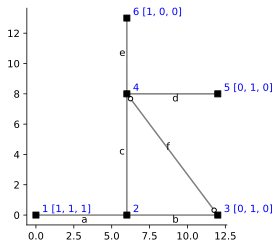

In [15]:
#Remove
fig, ax = plt.subplots(1,1)
em.plot_structure(P3, ax)

In [16]:
# Matrices
B = em.B_matrix(P3)
A = em.A_matrix(P3)
A.df

,$1$,$2$,$3$,$4$,$5$,$6$,$7$,$8$,$9$,$10$,$11$,$12$,$13$,$14$,$15$,$16$,$17$,$18$
$a_1$,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000,0.0,-1.0,-0.000000,0.0,0.000000,0.000000,0.0
$a_2$,-0.166667,0.0,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,-0.0,0.166667,1.0,0.000000,0.000000,0.0
$a_3$,-0.166667,1.0,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,-0.0,0.166667,0.0,0.000000,0.000000,0.0
$b_1$,-0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,-1.000,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
$b_2$,0.166667,1.0,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,-0.000,0.0,0.0,0.000000,0.0,-0.166667,0.000000,0.0
$b_3$,0.166667,0.0,0.000,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,-0.000,0.0,0.0,0.000000,0.0,-0.166667,0.000000,0.0
$c_1$,-1.000000,0.0,0.000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,-0.000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
$c_2$,0.000000,1.0,0.125,0.0,0.0,0.0,0.0,-0.000000,0.0,0.0,-0.125,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
$c_3$,0.000000,0.0,0.125,1.0,0.0,0.0,0.0,-0.000000,0.0,0.0,-0.125,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
$d_1$,0.000000,0.0,-1.000,0.0,0.0,0.0,0.0,-0.000000,0.0,1.0,0.000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0


In [17]:
# Vectors
Q = em.column_vector(B)
V = em.V_vector(A)

In [18]:
V.set_item('a_2',  1.1861e-3)
V.set_item('a_3', -0.1302e-3)
V.set_item('b_2', -2.5024e-3)
V.set_item('b_3',  1.2512e-3)
V.set_item('c_2',  0.5445e-3)
V.set_item('c_3',  2.6814e-3)
V.set_item('d_2', -0.3655e-3)
V.set_item('d_3',  0.1828e-3)
V.set_item('e_2', -2.1568e-3)
V.set_item('e_3',  1.0784e-3)
V.set_item('f_1',-14.6252e-3)

## Part 1

Model degree of static indeterminacy.

In [19]:
#Remove
print("The number of basic element forces is nq = {}".format(sum(P3.nq)))
print("The number of free dofs is nf = {}".format(P3.nf))
print("The degree of static indeterminacy is NOS = {}".format(P3.NOS))

The number of basic element forces is nq = 16
The number of free dofs is nf = 12
The degree of static indeterminacy is NOS = 4


## Check

In [20]:
P3.redundant(e['a'], '2')
P3.redundant(e['e'], '2')
P3.redundant(e['d'], '2')
P3.redundant(e['f'], '1')

In [20]:
Ar = A.add_cols(['1', '8', '9']).add_cols(['3','10']).add_cols(['13','11','12'])
Ar = Ar.remove(['7', 'b_3']).remove(['6', 'd_3']).remove(['5', 'e_3'])
Ar = Ar.remove('frame-axial').del_zeros()
Ar.i.df

,$1$,$2$,$3$,$4$
$a_3$,-0.166667,1.0,0.000,0.0
$b_2$,0.166667,1.0,0.000,0.0
$c_2$,0.000000,1.0,0.125,0.0
$c_3$,0.000000,0.0,0.125,1.0


In [21]:
Vr = em.V_vector(Ar, V)
Uf = Ar.i.inv@Vr.i
# Uf.row_data = Ar.i.f.column_data
Uf.df

,$U$
$1$,-0.007117
$2$,-0.001316
$3$,0.014886
$4$,0.000821


In [22]:
Vr = em.V_vector(Ar, V)
Uf = Ar.i.inv@Vr.i

['1', '2', '3', '4']

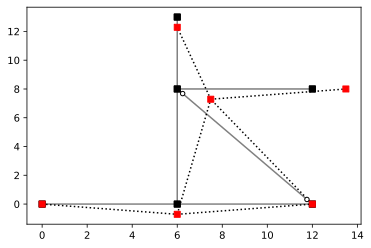

In [23]:
U = em.U_vector(A, Uf)
U.set_item( '8', U.get('1'))
U.set_item( '9', U.get('1'))
U.set_item('10', U.get('3'))
U.set_item('11', U.get('13'))
U.set_item('12', U.get('13'))
em.plot_U(P3, U, ax, scale=100)

In [24]:
type(A)

ema.matvecs.Kinematic_matrix